In [1]:
import sys

In [2]:
sys.path.append('/Users/maraludwig/Documents/Master/Deep Learning/project/ordner/doublependulum')

In [3]:
# Aktivieren des automatischen Neuladens
%load_ext autoreload
%autoreload 2

from DPSimulation import *

ModuleNotFoundError: No module named 'matplotlib'

In [5]:
#start winkel
a1, a2 = 0.0, 0.0
g = 9.81

t = 0.0
delta_t = 0.02


labels_csv = '/Users/maraludwig/Documents/Master/Deep Learning/project/labels.csv'


m1, m2, l1, l2, v1, v2, e_ges = sample_generator(5, 1, 10)


#print(m2)
#4,4 
dpi =100
t_stop = 5

trajectory_images(m1,l1,m2,l2,e_ges,v1,v2,dpi,labels_csv,t_stop)

transform = transforms.Compose([
    transforms.Resize((400, 400)),
    transforms.ToTensor(),
])


In [6]:
# Dataset und DataLoader initialisieren
image_dir = '/Users/maraludwig/Documents/Master/Deep Learning/project/images'
labels_csv = '/Users/maraludwig/Documents/Master/Deep Learning/project/labels.csv'
dataset = Dataset(image_dir=image_dir, labels_csv=labels_csv,transform=transform)

7.742490706743357 -6.9423653066589175
Original data:
tensor([0.4300, 0.2400, 0.3500])


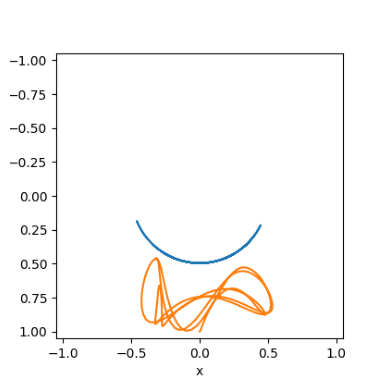

In [ ]:
index = 4

print(v1[index],v2[index])
show_first_example(dataset, index)

In [ ]:
# DataLoader erstellen
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False, num_workers=0)

In [10]:
import torch.nn.functional as F

class MDNHead(nn.Module):
    def __init__(self, in_features, num_components):
        super(MDNHead, self).__init__()
        self.fc1 = nn.Linear(in_features, 128)
        self.fc2 = nn.Linear(128, 64)

        # Output-Schichten für Mittelwerte, Standardabweichungen und Mischgewichte
        self.fc_mu = nn.Linear(64, num_components)
        self.fc_sigma = nn.Linear(64, num_components)
        self.fc_pi = nn.Linear(64, num_components)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # Mittelwerte, Standardabweichungen und Mischgewichte
        mu = self.fc_mu(x)
        sigma = F.softplus(self.fc_sigma(x))  # Softplus sorgt dafür, dass sigma immer positiv bleibt
        pi = F.softmax(self.fc_pi(x), dim=-1)  # Softmax für Mischgewichte

        return mu, sigma, pi

In [ ]:


#model = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)
#model.fc = nn.Linear(model.fc.in_features, 3) 

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
args = types.SimpleNamespace(dry_run=False, log_interval=16)

In [15]:
dataset[0][0].shape

torch.Size([3, 400, 400])

In [8]:
loss_array = []

device = "cpu"
for epoch in range(num_epochs):
    train(args, model, device, train_loader, optimizer, epoch, loss_fn)
    test(model, device, val_loader, loss_fn)  # Or with a test loader, if available'

Train Epoch: 0 [0/4 (0%)]	Loss: 5.316973
--- Epoch time: 3.059981107711792 seconds ---

Test set: Average loss: 3.6066

Train Epoch: 1 [0/4 (0%)]	Loss: 3.479251
--- Epoch time: 2.0741119384765625 seconds ---

Test set: Average loss: 2.9241

Train Epoch: 2 [0/4 (0%)]	Loss: 2.285739
--- Epoch time: 2.096829891204834 seconds ---

Test set: Average loss: 0.6108

Train Epoch: 3 [0/4 (0%)]	Loss: 0.436238
--- Epoch time: 2.0216190814971924 seconds ---

Test set: Average loss: 1.5075

Train Epoch: 4 [0/4 (0%)]	Loss: 0.090348
--- Epoch time: 2.143537998199463 seconds ---

Test set: Average loss: 4.2875



In [14]:
path = '/Users/maraludwig/Documents/Master/Deep Learning/project/train_loss.pkl'

with open(path, "rb") as f:
    loaded_data = pickle.load(f)

print(loaded_data)

[5.316972732543945, 3.4792511463165283, 2.2857391834259033, 0.43623825907707214, 0.09034758806228638]


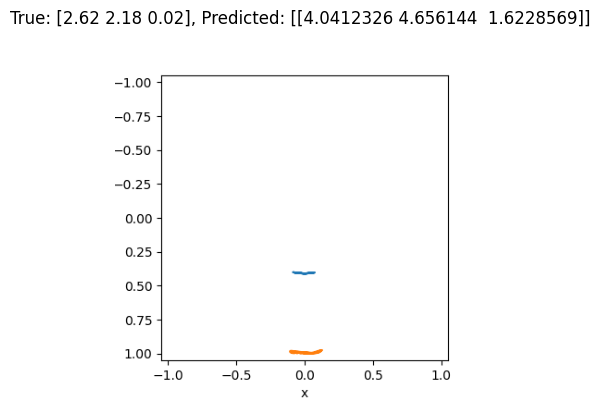

In [13]:
show_example(model,dataset,index=1, device=device)